In [558]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [559]:
import numpy as np

In [560]:
users = pd.read_csv('train_skb.csv', header=0, sep='\t', encoding ='cp1251')

In [561]:
users[:5]  # проверка - верно ли все подгрузилось

,id,taxactionSystem,regdt,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,OrgCreationDate,documentsCount,cnt_users,is_prolong
0,101969,"УСН, Доходы 6%",1994-03-26,5.0,0.0,0.0,0.0,0,04.12.2014,2.0,0.0,1.0
1,108477,ОСНО,2012-12-05,1.0,0.0,0.0,0.0,0,22.09.2014,5.0,0.0,0.0
2,101476,"УСН, Доходы 6%",2009-11-15,1.0,3.0,3.0,2.0,0,05.04.2016,0.0,0.0,1.0
3,102579,"УСН, Доходы за вычетом расходов 15%",2015-08-09,1.0,0.0,0.0,0.0,0,24.09.2015,0.0,0.0,0.0
4,103110,"УСН, Доходы за вычетом расходов 15%",2015-03-29,0.0,0.0,0.0,0.0,0,03.04.2015,4.0,0.0,0.0


### Посмотрим на распределения числовых признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3DC3BA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x3EEF2AB0>]], dtype=object)

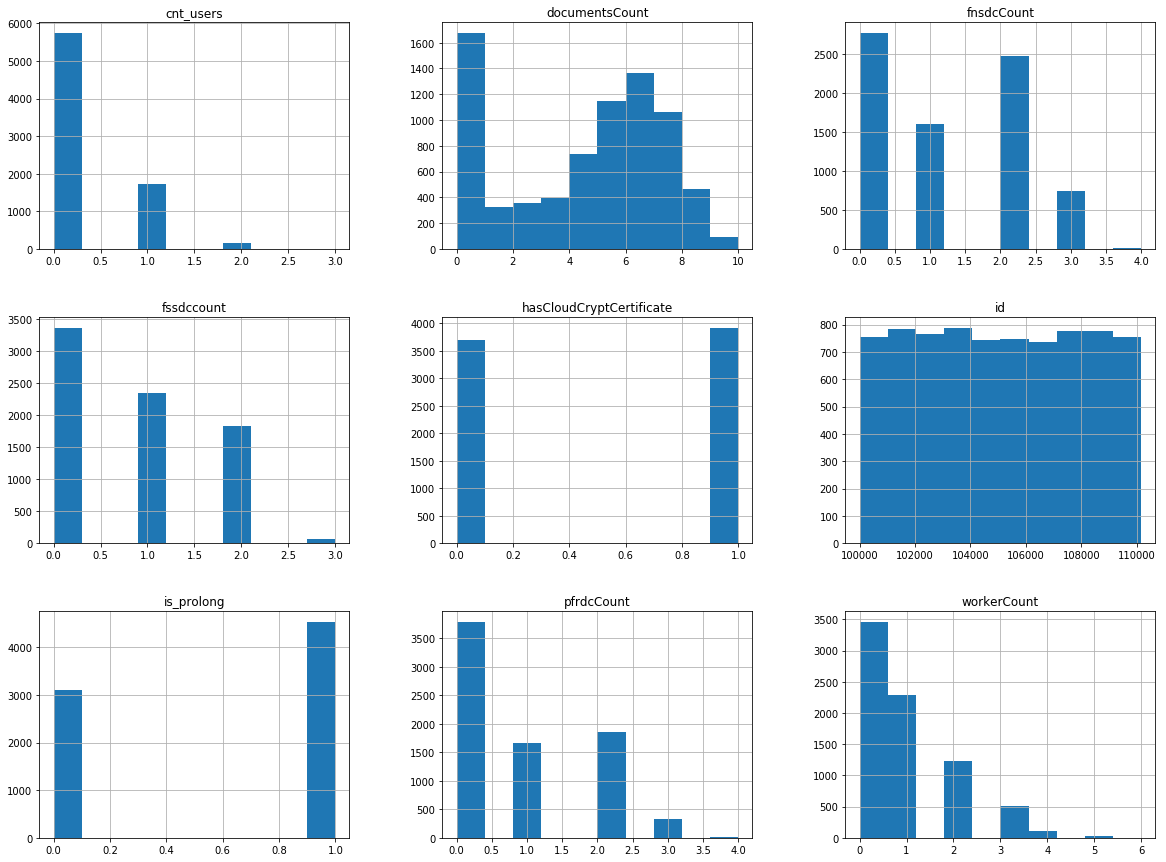

In [562]:
users.hist(figsize=(20,15))

Много клиентов, у которых нет оформленных документов вообще. ID естественно неинформативный признак

In [563]:
users.corr()

,id,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,documentsCount,cnt_users,is_prolong
id,1.000000,-0.001004,-0.017101,-0.016469,-0.018954,-0.007336,-0.019286,-0.013948,-0.014134
workerCount,-0.001004,1.000000,0.185827,0.238348,0.027925,-0.094538,0.160805,0.050974,0.256153
fssdccount,-0.017101,0.185827,1.000000,0.788965,0.743764,0.455691,0.320929,0.174457,0.356721
pfrdcCount,-0.016469,0.238348,0.788965,1.000000,0.660638,0.386241,0.293190,0.149861,0.311941
fnsdcCount,-0.018954,0.027925,0.743764,0.660638,1.000000,0.577331,0.367311,0.191766,0.350731
hasCloudCryptCertificate,-0.007336,-0.094538,0.455691,0.386241,0.577331,1.000000,0.283826,0.166902,0.389894
documentsCount,-0.019286,0.160805,0.320929,0.293190,0.367311,0.283826,1.000000,0.238247,0.351802
cnt_users,-0.013948,0.050974,0.174457,0.149861,0.191766,0.166902,0.238247,1.000000,0.140143
is_prolong,-0.014134,0.256153,0.356721,0.311941,0.350731,0.389894,0.351802,0.140143,1.000000


Плохая корреляция пролонгации с количеством пользователей. Остальные признако тоже не особо сонаправлены. 

In [564]:
import seaborn as sns

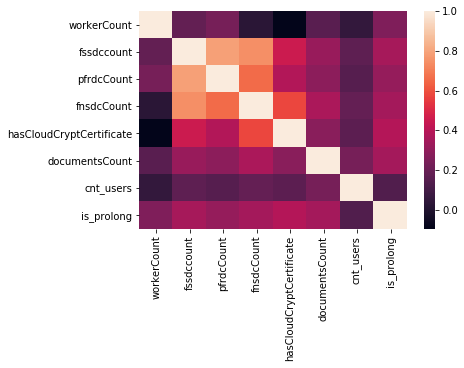

In [565]:
sns.heatmap(users.drop([u'id'],axis=1).corr());

Тепловая карта для лучшего восприятия. Видно, что признаки "количество документов отправленных  в ФСС",".. в ПФР",".. в  ФНС" кореллируют. Можно предположить, что те кто пользуется хотя бы одной частью сервиса, начинают пользоваться и другими функциями. Соответственно, можно сообщить продажникам, чтобы они пытались продать хотя бы одну ключевую из этих функцию для клиента, а после показывать удобство использования других функций. Также видна корелляция количества докумнетов ФНС, ФСС и владения крипто-ключом... Логично, ведь без него не получится(как мне кажется) удаленно отправить документы.

Далее я вывел все варианты написания системы налогообложения в столбце taxactionSystem

ОСНО                                           2752
УСН, Доходы 6%                                 2004
УСН, Доходы за вычетом расходов 15%            1295
ЕНВД                                            681
УСН, Доходы за вычетом расходов 7%              230
УСН, Доходы 6% +ЕНВД                            136
УСН, Доходы за вычетом расходов 10%             134
УСН, Доходы за вычетом расходов 5%              133
УСН, Доходы 3%                                  107
УСН, Доходы за вычетом расходов 15% +ЕНВД        66
УСН, Доходы за вычетом расходов 7% +ЕНВД         20
УСН, Доходы за вычетом расходов 12,5%            17
УСН, Доходы за вычетом расходов 5% +ЕНВД         13
УСН, Доходы 3% +ЕНВД                             12
УСН, Доходы за вычетом расходов 6%                8
УСН, Доходы за вычетом расходов 12%               6
УСН, Доходы за вычетом расходов 10% +ЕНВД         4
УСН, Доходы 4%                                    2
УСН, Доходы за вычетом расходов 7,5%              2
УСН, Доходы 

Text(0.5,1,u'\u0421\u0438\u0441\u0442\u043c\u044b \u043d\u0430\u043b\u043e\u0433\u043e\u043e\u0431\u043b\u043e\u0436\u0435\u043d\u0438\u044f')

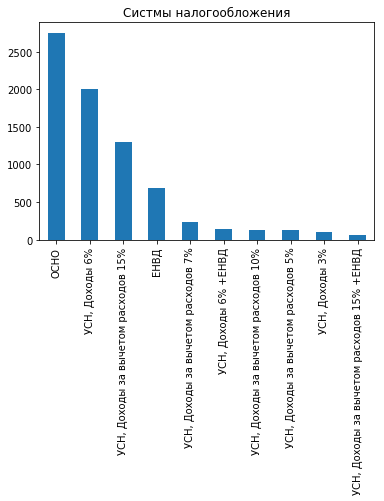

In [566]:
%matplotlib inline
print users['taxactionSystem'].value_counts()
a = users['taxactionSystem'].value_counts()
a[:10].plot(kind='bar')
plt.title(u'Систмы налогообложения')

В связи с тем что категорий получится очень много, необходимо сгруппировать их в укрупненные группы. Я решил, что буду группировать по трудоемкости на следующие категории: ОСНО, ЕНВД, УСН-ЕНВД, УСН-расходы, УСН-доходы

### Добавление столбца cleartaxsystem - для уменьшения количества категорий в системах налогообложения

In [567]:
users['cleartaxsystem'] = ""*users.shape[1]

### Удаление объектов, в которых есть пропущенные значения. В данном случае пропущены только значения в столбце regdt. Количество объектов с пропущенными значениями незначительно (22 из 7626)

In [568]:
users.info()
users.dropna(inplace=True)
print 'В выборке осталось объектов:', users.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 13 columns):
id                          7626 non-null int64
taxactionSystem             7626 non-null object
regdt                       7604 non-null object
workerCount                 7626 non-null float64
fssdccount                  7626 non-null float64
pfrdcCount                  7626 non-null float64
fnsdcCount                  7626 non-null float64
hasCloudCryptCertificate    7626 non-null int64
OrgCreationDate             7626 non-null object
documentsCount              7626 non-null float64
cnt_users                   7626 non-null float64
is_prolong                  7626 non-null float64
cleartaxsystem              7626 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 655.4+ KB
В выборке осталось объектов: 7604


### Проставляем обобщеные схемы налогообложения в столбец "cleartaxsystem"

In [569]:
mask = (users['taxactionSystem']==u'ОСНО')
users.loc[mask, 'cleartaxsystem'] = u'ОСНО'
mask = (users['taxactionSystem']==u'ЕНВД')
users.loc[mask, 'cleartaxsystem'] = u'ЕНВД'

In [570]:
mask = (users['taxactionSystem'].str.contains(u'ЕНВД')) & (users['taxactionSystem'].str.contains(u'УСН'))
users.loc[mask, 'cleartaxsystem'] = u'УСН-ЕНВД'
mask = (users['taxactionSystem'].str.contains(u'расходов')) & (users.cleartaxsystem !=u'УСН-ЕНВД')
users.loc[mask, 'cleartaxsystem'] = u'УСН-расходы'
users.cleartaxsystem[users.cleartaxsystem==''] = u'УСН-доходы'
users.cleartaxsystem.value_counts()

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


ОСНО           2736
УСН-доходы     2111
УСН-расходы    1826
ЕНВД            679
УСН-ЕНВД        252
Name: cleartaxsystem, dtype: int64

Теперь у меня 5 категорий - систем налогообложения. В каждой из них больше значений, что должно дать лучший результат на обучении, чем множество категорий с разными ставками налога.

### Количество продливших подписку компаний в зависимости от системы налогообложения

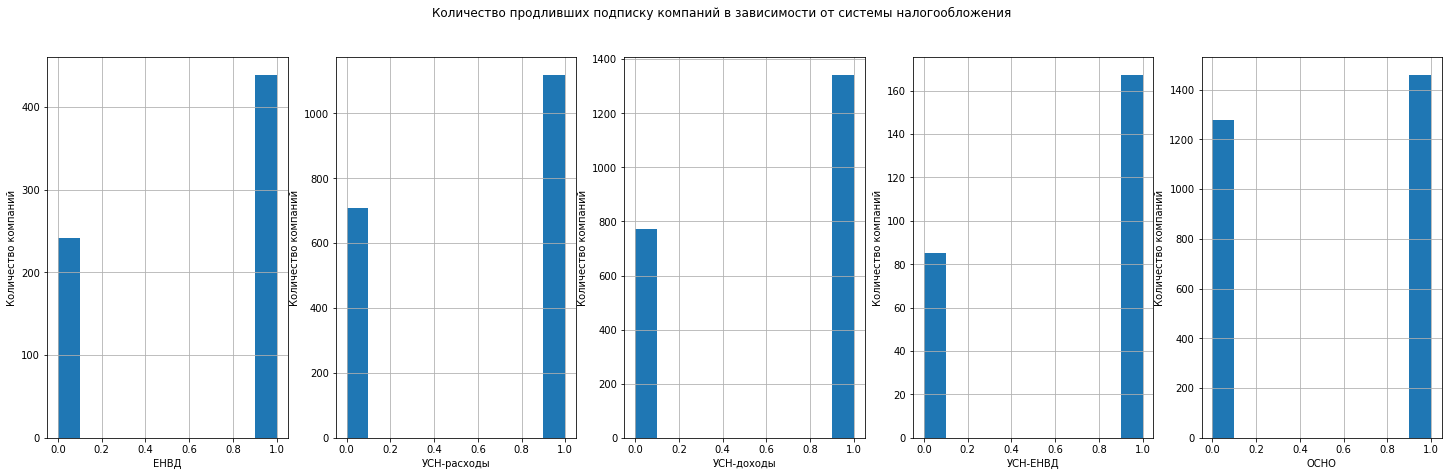

In [571]:
plt.figure(figsize=(25,7))
z=1
for i in set(users.cleartaxsystem):
    plt.subplot(1,5,z)
    users[users.cleartaxsystem ==i].is_prolong.hist()
    z+=1
    plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
    plt.suptitle(u'Количество продливших подписку компаний в зависимости от системы налогообложения')

Видно что у компаний на общей системе налогообложения процент непродления гораздо выше. Причины могут быть разные. ПО моему мнению у компаний на ОСНО достаточно бухгалтеров и иных систем ведения учета и формирования отчетности, в свзяи с чем дополнительные продукты им попросту не нужны. В отличие от тех, кто использует систему как основной инструмент.

Text(0.5,0.98,u'\u041a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u043e \u043f\u0440\u043e\u0434\u043b\u0438\u0432\u0448\u0438\u0445 \u043f\u043e\u0434\u043f\u0438\u0441\u043a\u0443 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043d\u0430\u043b\u0438\u0447\u0438\u044f \u044d\u043b\u0435\u043a\u0442\u0440\u043e\u043d\u043d\u043e\u0439 \u043f\u043e\u0434\u043f\u0438\u0441\u0438')

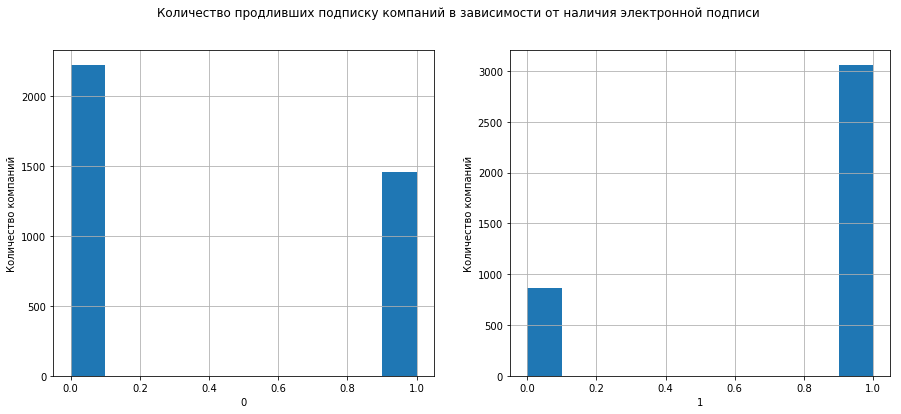

In [572]:
plt.figure(figsize=(15,6))
z=1
for i in set(users.hasCloudCryptCertificate):
    plt.subplot(1,2,z)
    users[users.hasCloudCryptCertificate == i].is_prolong.hist()
    z+=1
    plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
plt.suptitle(u'Количество продливших подписку компаний в зависимости от наличия электронной подписи')

Также хорошо прослеживается зависимость продления подписки от наличия электронной подписи. Те кто не приобрел её гораздо чаще отказываются, чем те, кто приобрел. Возможно это потому, что были затраты на создание электронной подписи и непродление будет являться признанием своей ошибки. А люди не любят признавать свои ошибки, тем более что в данном случае они оплачиваются за счет работодателя (продление, возможно не нужной, им подписки). Поэтому сигнал в отдел продаж, попытаться продать электронную подпись. 

Text(0.5,0.98,u'\u041a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u043e \u043f\u0440\u043e\u0434\u043b\u0438\u0432\u0448\u0438\u0445 \u043f\u043e\u0434\u043f\u0438\u0441\u043a\u0443 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u0430 \u0434\u043e\u043a\u0443\u043c\u0435\u043d\u0442\u043e\u0432')

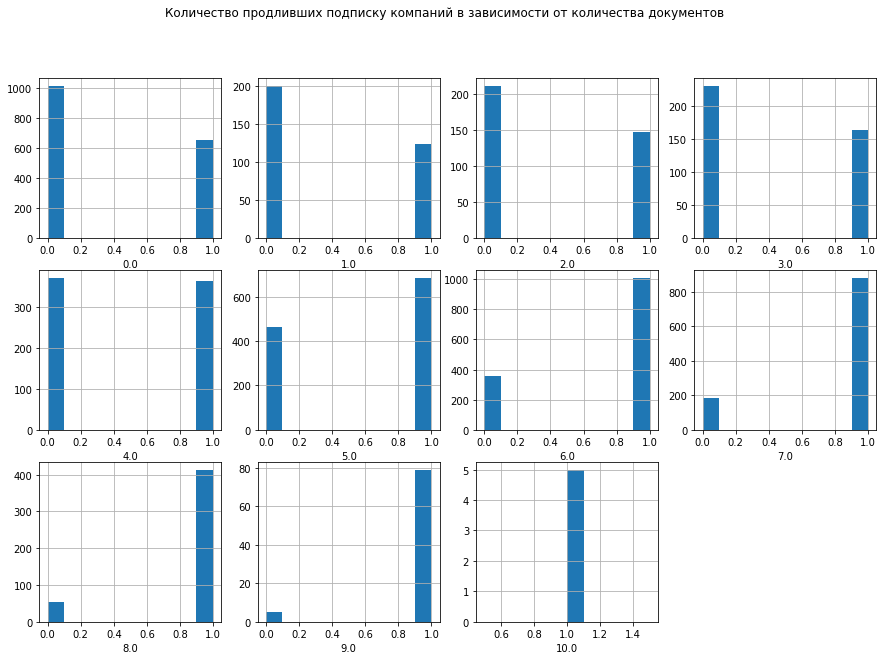

In [573]:
plt.figure(figsize=(15,10))
z=1
for i in set(users.documentsCount):
    plt.subplot(3,4,z)
    users[users.documentsCount == i].is_prolong.hist()
    z+=1
    #plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
plt.suptitle(u'Количество продливших подписку компаний в зависимости от количества документов')

Логичная зависимость - с ростом количества отправленных документов растет вероятность пролонгации. Чем люди активнее используют, тем меньше вероятность непродления подписки.

Text(0.5,0.98,u'\u041a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u043e \u043f\u0440\u043e\u0434\u043b\u0438\u0432\u0448\u0438\u0445 \u043f\u043e\u0434\u043f\u0438\u0441\u043a\u0443 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u0430 \u0440\u0430\u0431\u043e\u0442\u043d\u0438\u043a\u043e\u0432')

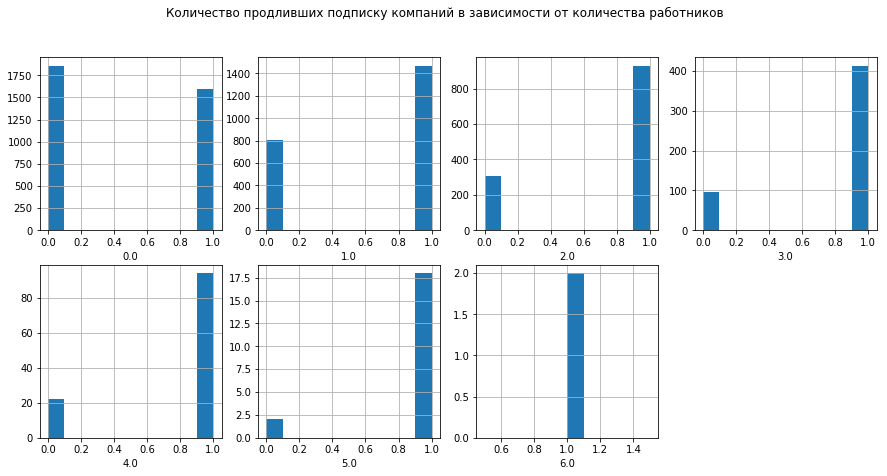

In [574]:
plt.figure(figsize=(15,7))
z=1
for i in set(users.workerCount):
    plt.subplot(2,4,z)
    users[users.workerCount ==i].is_prolong.hist()
    z+=1
    #plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
plt.suptitle(u'Количество продливших подписку компаний в зависимости от количества работников')

Вот не совсем явная зависимость, что с увеличением числа работников, растет вероятность продления подписки. Возможно система каким-то образом облегчает формирование и отправку документов при росте количества сотрудников. Нетривиальное взаимоотношение, нужно будет проверять.

In [575]:
users.OrgCreationDate = pd.to_datetime(users.OrgCreationDate, format='%d.%m.%Y')

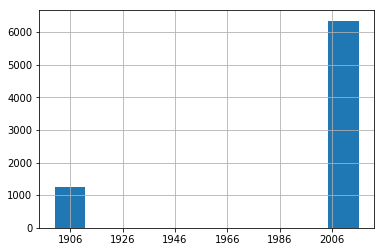

In [576]:
users.OrgCreationDate.hist() #[users.OrgCreationDate > '2000-01-01']

Странное распределение обусловлено наличием незаполненных дат в графе OrgCreationDate, которые по умолчанию равны 01.01.1900. С ним надо будет что-то делать

Text(0.5,0.98,u'\u0413\u0438\u0441\u0442\u043e\u0433\u0440\u0430\u043c\u043c\u0430 \u0440\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u044f \u0434\u0430\u0442\u044b \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438 \u0432 \u0411\u041a')

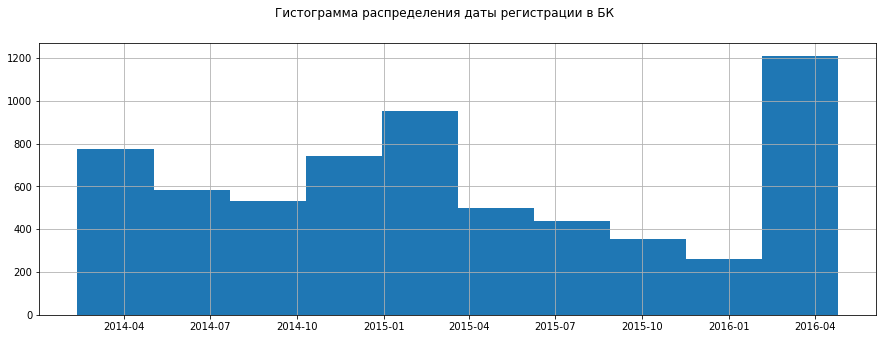

In [577]:
plt.figure(figsize=(15,5))
users[users.OrgCreationDate > '2000-01-01'].OrgCreationDate.hist()
plt.suptitle(u'Гистограмма распределения даты регистрации в БК')

Первые даты внесения в систему начинаются с 2014 года. Возможно это год начала продаж продукта. Вероятнее всего для модели лучше чтобы данный признак не вносил в результат никакого веса на тех объектах, у которых дата была не указана. 
Поэтому присвою максимальную дату этим объектам.
Кстати, программистам можно сообщить, чтобы они формировали эту дату автоматически по факту нажатия на кнопку "добавить организацию".

In [578]:
max_date = users.OrgCreationDate.max()
print max_date
users.OrgCreationDate[users.OrgCreationDate < '2000-01-01'] = max_date
print 'Пропущенным значениям признака OrgCreationDate присвоена дата формирования выборки'

2016-04-26 00:00:00
Пропущенным значениям признака OrgCreationDate присвоена дата формирования выборки


C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Добавляем столбец, в котором будет разница между датой формирования выборки и датой регистрации компании в системе.

In [579]:
users['timefrom'] = ""*users.shape[1]

In [580]:
users.timefrom = max_date - users.OrgCreationDate
users.timefrom[0]

Timedelta('509 days 00:00:00')

In [581]:
users.timedelta = users.timefrom.astype('timedelta64[D]')
users.timefrom = users.timedelta

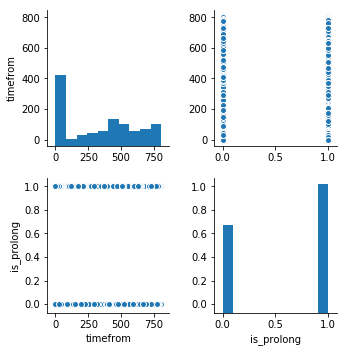

In [582]:
sns_plot = sns.pairplot(users[[u'timefrom',u'is_prolong']])

Зависимость на графике явно не видна, козможно её и нет.

Text(0.5,1,u'\u0413\u0438\u0441\u0442\u043e\u0433\u0440\u0430\u043c\u043c\u0430 \u0440\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u044f \u043a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u0430 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u0441\u0440\u043e\u043a\u0430 \u0432\u043b\u0430\u0434\u0435\u043d\u0438\u044f \u043f\u043e\u0434\u043f\u0438\u0441\u043a\u043e\u0439')

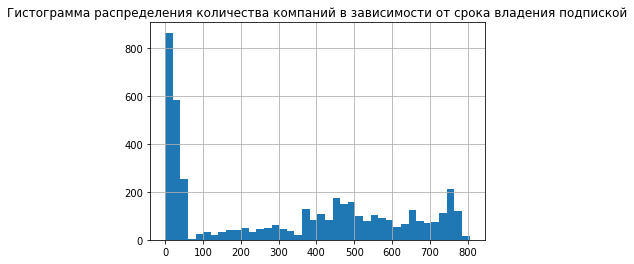

In [583]:
users[users.is_prolong == 1].timefrom.hist(bins=40)
plt.title(u'Гистограмма распределения количества компаний в зависимости от срока владения подпиской')

Не понятен всплеск возле нуля (причем нулевой понятен - все присвоеные даты дают 0 в этом показателе). Получается, что  пролонгировали подписку те компании, которые подключились в последние 60 дней. Если подписка ежемесячная, то это многое объясняет. Можно предположить, что развтием продаж продукта интенсивно занялись в последние 2 месяца, что дало такой скачкообразный результат, а до этого особо продажами не занимались.
А если не ежемесячная, тогда у меня остается вопрос, как интерпретировать полученный результат.

Text(0.5,1,u'\u0413\u0438\u0441\u0442\u043e\u0433\u0440\u0430\u043c\u043c\u0430 \u0440\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u044f \u043a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u0430 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u0441\u0440\u043e\u043a\u0430 \u0432\u043b\u0430\u0434\u0435\u043d\u0438\u044f \u043f\u043e\u0434\u043f\u0438\u0441\u043a\u043e\u0439 \u043d\u0435 \u043f\u0440\u043e\u0434\u043b\u0438\u0432\u0448\u0438\u0445 \u0435\u0451')

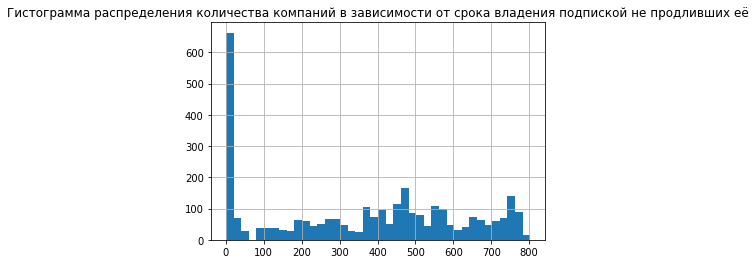

In [584]:
users[users.is_prolong == 0].timefrom.hist(bins=40)
plt.title(u'Гистограмма распределения количества компаний в зависимости от срока владения подпиской не продливших её')

Среди тех кто не пролонгировал подписку также нет явных зависимостей. Всплеск в нуле понятен. Также отмечаю, что необходимо будет исключить эти данные при построении моделей методами случайного леса и градиентного бустинга. Чтобы не обучаться на искусственных данных. На линейных моделях можно обучать и с ними

Поскольку есть всплеск в пролонгации в последние 60 дней, построим распределение признаков для объектов у которых с даты регистрации прошло менее 60 дней

In [585]:
print "Количество компаний зарегистрированных в системе в последние 60 дней:", len(users[users.timefrom < 60].index)

Количество компаний зарегистрированных в системе в последние 60 дней: 2467


Text(0.5,0.98,u'\u0413\u0438\u0441\u0442\u043e\u0433\u0440\u0430\u043c\u043c\u0430 \u0440\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u044f \u043f\u0440\u0438\u0437\u043d\u0430\u043a\u043e\u0432 \u0443 \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u043f\u043e\u043a\u043b\u044e\u0447\u0438\u0432\u0448\u0438\u0445\u0441\u044f \u0432 \u043f\u043e\u0441\u043b\u0435\u0434\u043d\u0438\u0435 60 \u0434\u043d\u0435\u0439')

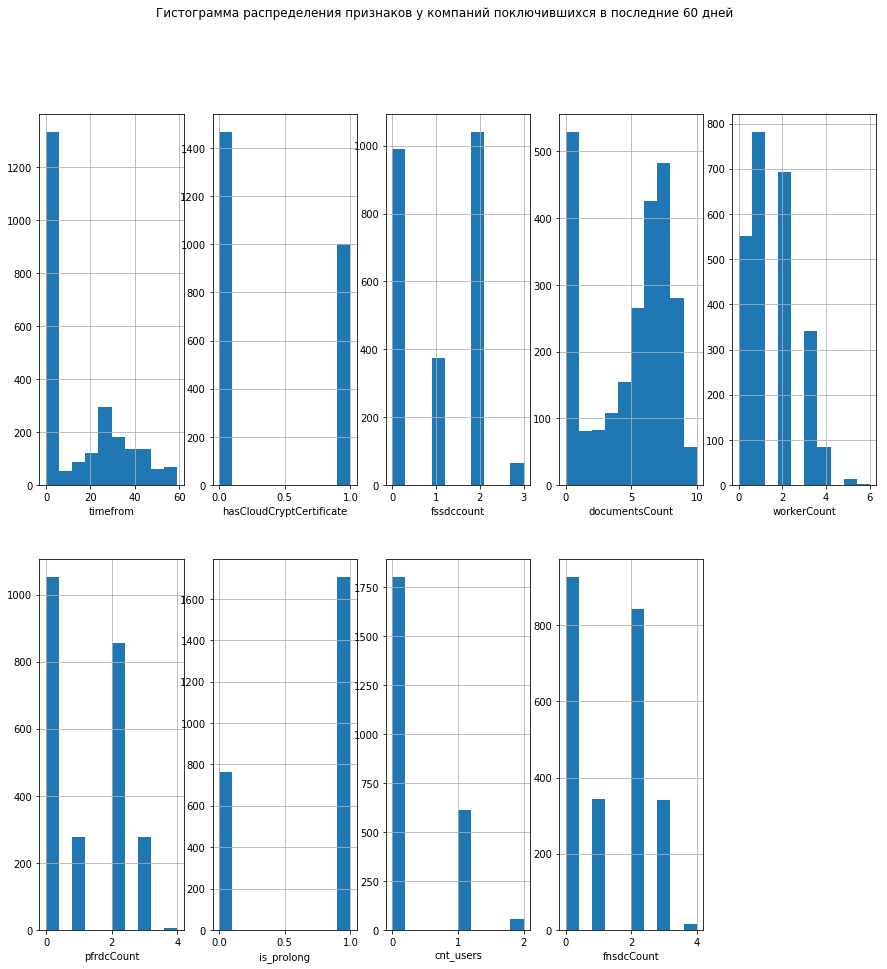

In [586]:
plt.figure(figsize=(15,15))
z=1
cols = set(users.columns)-set(['id','taxactionSystem','OrgCreationDate','regdt','cleartaxsystem'])
for i in set(cols):
    plt.subplot(2,5,z)
    users[users.timefrom < 60][i].hist()
    z+=1
    plt.xlabel(i)
plt.suptitle(u'Гистограмма распределения признаков у компаний поключившихся в последние 60 дней')    

Количество продаж электронных подписей мало, а поскольку компании реже отказываются от услуг Контура при наличии подписи желательно её продавать более активно.

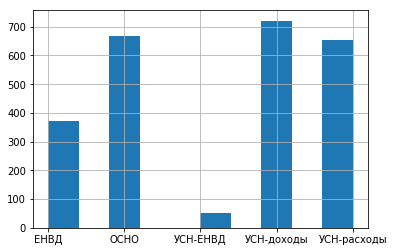

In [587]:
users[users.timefrom < 60].cleartaxsystem.hist()

Гистограмма распределения продаж за последние 60 дней в зависимости от системы налогообложения клиента дает информацию что вектор продаж верный, меньше продаж компаниям с ОСНО (потому что они чаще отказываются). Для сравнения - распределение по всем клиентам

Text(0.5,1,u'\u041a\u043e\u043b\u0438\u0447\u0435\u0441\u0442\u0432\u043e \u043a\u043e\u043c\u043f\u0430\u043d\u0438\u0439 \u043f\u043e \u0441\u0438\u0441\u0442\u0435\u043c\u0430\u043c \u043d\u0430\u043b\u043e\u0433\u043e\u043e\u0431\u043b\u043e\u0436\u0435\u043d\u0438\u044f')

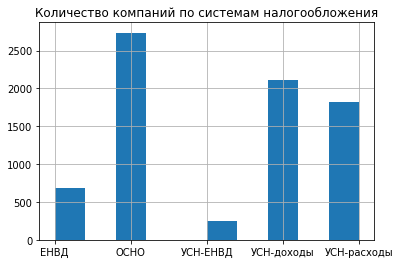

In [588]:
users.cleartaxsystem.hist()
plt.title(u'Количество компаний по системам налогообложения')

### Есть еще одна дата в наших признаках

Приведу её к формату Datetime

In [589]:
#создание нового признака
users['timefromreg'] = ""*users.shape[1]
#приведение к формату Datetime
users.regdt = pd.to_datetime(users.regdt, format='%Y-%m-%d', errors='coerce')
#Получение разницы между датой формирования выборки и датой регистрации
users.timedelta = max_date - users.regdt
# заполнение соответствующих значений признака в датафрейме
users.timefromreg = users.timedelta.astype('timedelta64[D]')

Text(0.5,1,u'\u041f\u0440\u043e\u043b\u0448\u043e \u0432\u0440\u0435\u043c\u0435\u043d\u0438 \u043f\u043e\u0441\u043b\u0435 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438 \u0432 \u0433\u043e\u0441\u043e\u0440\u0433\u0430\u043d\u0430\u0445')

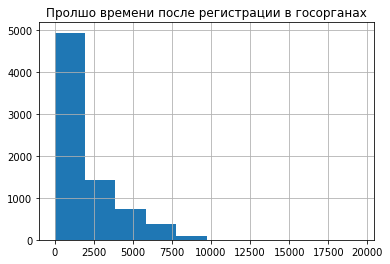

In [590]:
users.timefromreg.hist()
plt.title(u'Пролшо времени после регистрации в госорганах')

У распределения тяжелый хвост

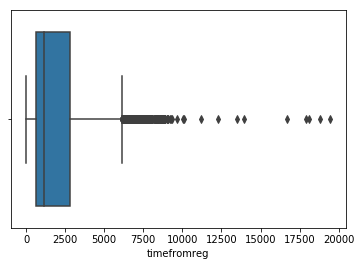

In [591]:
sns.boxplot(users.timefromreg)

Да, достаточно много объектов выходят за рамки 3х сигм. Ограничу максимальное значение этого объекта 5000 дней

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


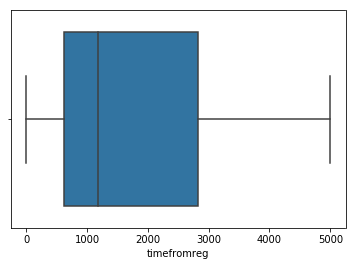

In [592]:
users.timefromreg[users.timefromreg >= 5000] = 5000
sns.boxplot(users.timefromreg)

Выбросов нет

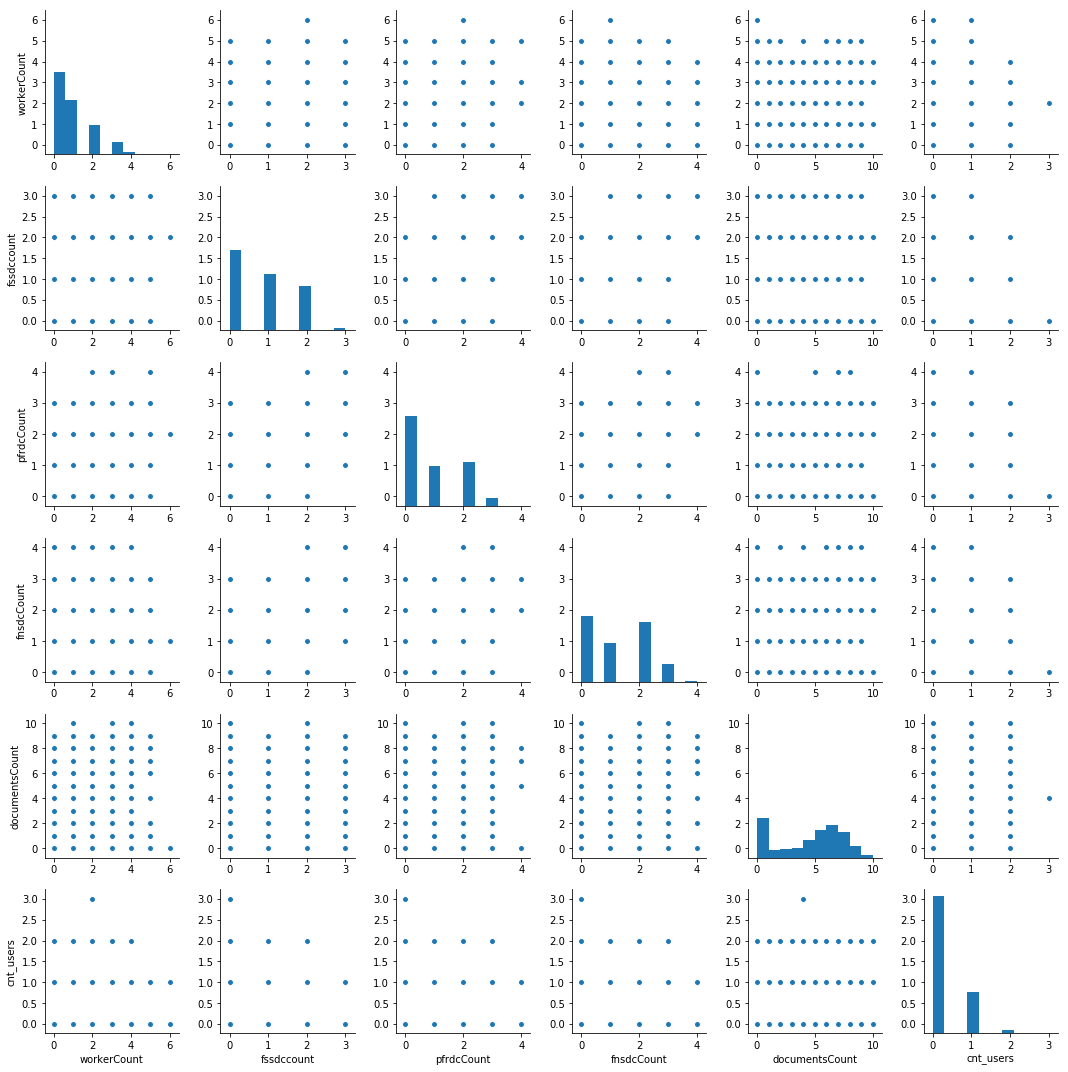

In [593]:
cols = ['workerCount','fssdccount','pfrdcCount','fnsdcCount','documentsCount','cnt_users']
sns.pairplot(users[cols])

Зрительно зависимости не видны

Timedelta('-657 days +00:00:00')

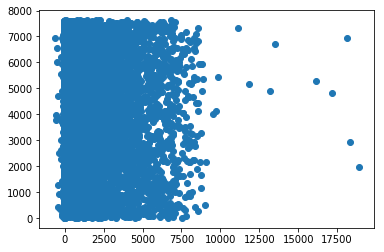

In [594]:
delta = users.OrgCreationDate - users.regdt
plt.scatter(delta.astype('timedelta64[D]'),users.index)
delta.min()

Весьма подозрительно, что есть комании, которые попали в БК ранее чем зарегистрировались. И таких достаточно много.

Text(0.5,0,u'\u0434\u043d\u0435\u0439 \u0440\u0430\u0437\u043d\u0438\u0446\u044b \u043c\u0435\u0436\u0434\u0443 \u0434\u0430\u0442\u0430\u043c\u0438 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438')

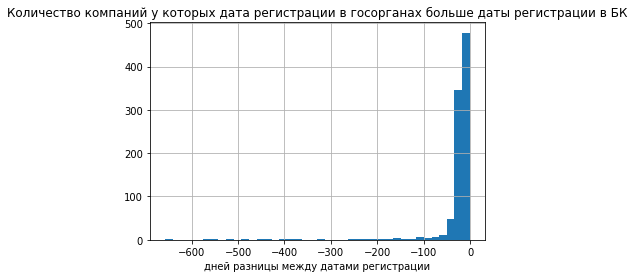

In [595]:
delta[delta.astype('timedelta64[D]')<0].astype('timedelta64[D]').hist(bins=40)
plt.title(u'Количество компаний у которых дата регистрации в госорганах больше даты регистрации в БК')
plt.xlabel(u'дней разницы между датами регистрации')

Видно что это ошибки заполнения. При этом, разбираясь в признаке нашел особенность, что в последние 60 дней не было таких ошибок. Вероятно программисты внесли ограничение для операторов ПК, которое не позволяет внести дату регистрации в базе Контура старше, чем дата регистрации в госслужбах ФНС, ФСС итд.

Text(0.5,0,u'\u0434\u043d\u0435\u0439 \u0440\u0430\u0437\u043d\u0438\u0446\u044b \u043c\u0435\u0436\u0434\u0443 \u0434\u0430\u0442\u0430\u043c\u0438 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438')

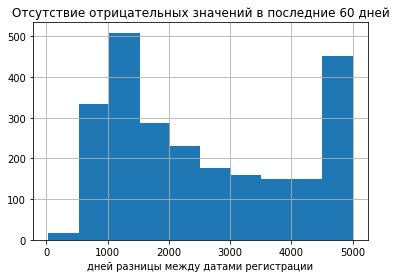

In [596]:
users[users.timefrom < 60].timefromreg.hist()
plt.title(u'Отсутствие отрицательных значений в последние 60 дней')
plt.xlabel(u'дней разницы между датами регистрации')

Также видно, что компаний, которые зарегистрировлись недавно (до 500 дней) практически нет, около 10-15. Это может быть связано с тем, что политика продаж такая, чтобы не регистрировать молодые бизнесы, поскольку 95% из них распадается в первые 5 лет. А может быть с тем, что никто из продажников не выгружает базу новых зарегистрированных компаний и не работает с ней.  А может я ошибся:) 
## Не покидает ощущение, что дата регистрации в системе и дата регистрации в госслужбах для данного случая - бесполезные данные.
И что показатель is_prolong это не факт продления на дату, а текущий статус наличия или отсутствия подписки у компании. 

Таким образом возможно эти данные стоит оставить, если они будут информативны для линейной модели, пусть будут, если нет - модель снизит зависимость от них. 

## Тогда задача немного переформулируется, а именно - есть информация кто пользуется подпиской сейчас и есть информация - кто отказался от подписки - необходимо определить среди тех кто пользуется, кто находится в группе риска, кто наиболее сильно похож на группу отказавшихся.


In [597]:
users[users['OrgCreationDate']<users['regdt']][['OrgCreationDate','regdt']].count()

OrgCreationDate    932
regdt              932
dtype: int64

932 компании с ошибочно заведенными датами регистрации в системе - регистрации в госслужбах. из ~7000 - достаточно много. Поскольку дата регистрации компании крайне важная (как например дата выдачи паспорта гражданина) и её, вероятнее всего, вводят на основании свидетельств регистрации в ИФНС, буду опираться на предположение, что дата регистрации компании в системе не может быть младше чем дата рагистрации в госслужбах.

In [598]:
users.OrgCreationDate[users['OrgCreationDate']<users['regdt']] = users.regdt[users['OrgCreationDate']<users['regdt']]

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Проверяем

In [599]:
users[users['OrgCreationDate']<users['regdt']][['OrgCreationDate','regdt']].count()

OrgCreationDate    0
regdt              0
dtype: int64

посмотрим на графике

Text(0,0.5,u'ID')

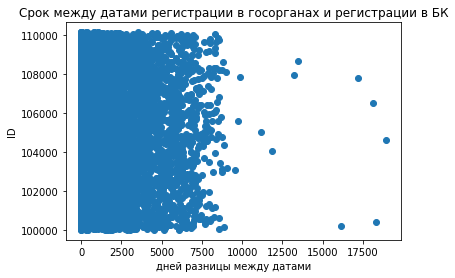

In [600]:
delta = users.OrgCreationDate - users.regdt
plt.scatter(delta.astype('timedelta64[D]'),users.id)
delta.min()
plt.title(u'Срок между датами регистрации в госорганах и регистрации в БК')
plt.xlabel(u'дней разницы между датами')
plt.ylabel(u'ID')

Влияние этой человеческой ошибки на будующую модель снижено. Не зря в качестве одной из осей выбрал ID. - Можно посмотреть с какого числа начался отсчет ID. на каком остановился в рамках этой выборки. При этом разница около 10000, а количество объектов было  около 7000. Не знаю что это дает, но наблюдение отмечено.

Посмотрим на корреляцию признаков в новом признаковом пространстве

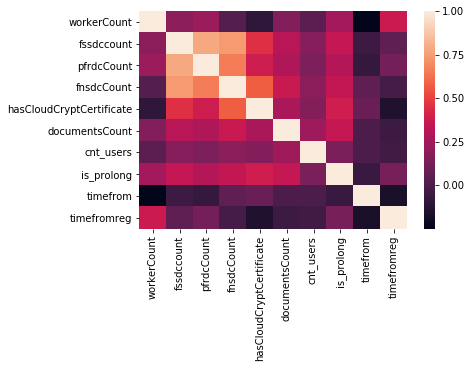

In [601]:
sns.heatmap(users.drop([u'id'],axis=1).corr());

как видно из тепловой карты - основными информативными признаками являются количества отправленных документов и наличие электронной подписи

In [602]:
users['month'] = users.OrgCreationDate.apply(lambda x : x.month)

Text(0.5,0.98,u'\u0420\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u0435 \u043f\u0440\u043e\u043b\u043e\u043d\u0433\u0430\u0446\u0438\u0439 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043c\u0435\u0441\u044f\u0446\u0430 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438')

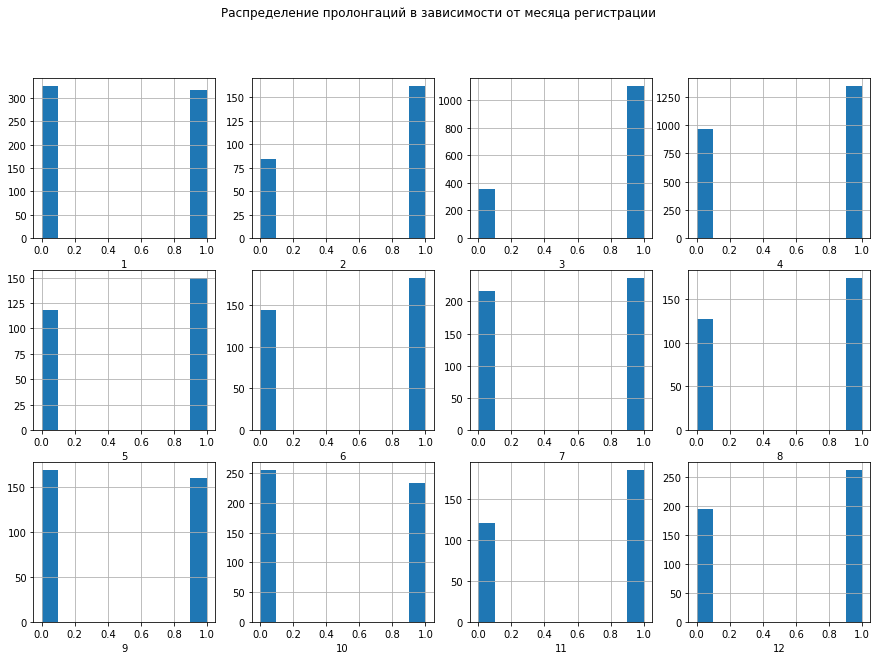

In [603]:
plt.figure(figsize=(15,10))
z=1
for i in range(1,13):
    plt.subplot(3,4,z)
    users[users.month == i].is_prolong.hist()
    z+=1
    #plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
plt.suptitle(u'Распределение пролонгаций в зависимости от месяца регистрации')


Поразительно, но те компании, которые зарегистрированы в базе контура в марте и феврале гораздо реже отказываются от продления. Хуже всех - подключившиеся в сентябре, октябре и январе. 

2016-04-26 00:00:00


Text(0.5,0.98,u'\u0420\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u0435 \u0447\u0438\u0441\u043b\u0430 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0439 \u043f\u043e \u043c\u0435\u0441\u044f\u0446\u0430\u043c \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438 \u0432 \u0411\u041a \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043f\u0440\u043e\u043b\u043e\u043d\u0433\u0430\u0446\u0438\u0438')

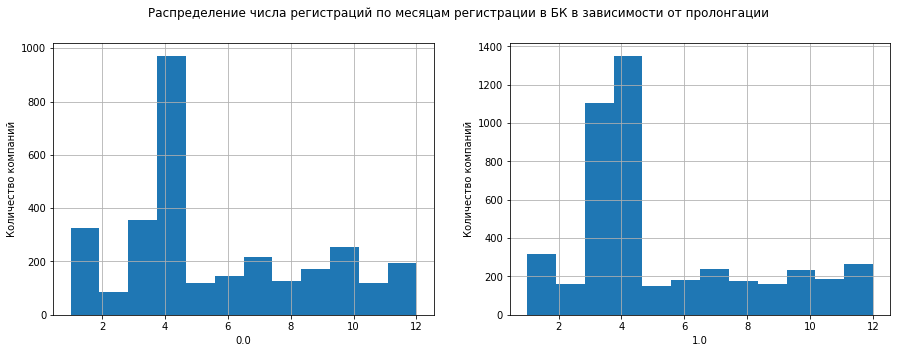

In [604]:
plt.figure(figsize=(15,5))
#users[users.is_prolong == 1].month.hist(bins=12)
z=1
for i in set(users.is_prolong):
    plt.subplot(1,2,z)
    users[users.is_prolong == i].month.hist(bins=12)
    z+=1
    plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
print max_date
plt.suptitle(u'Распределение числа регистраций по месяцам регистрации в БК в зависимости от пролонгации')

Судя уже по этому отображению напрашивается мысль, что гипотеза некоей зависимости не подтвердилась. Вероятнее всего все связано c "недавним" увеличением активности в продажах и маленьким прошедшим сроком после оформления 1-й подписки.

In [605]:
users.monthreg = users.regdt.apply(lambda x : x.month)

Text(0.5,0.98,u'\u0420\u0430\u0441\u043f\u0440\u0435\u0434\u0435\u043b\u0435\u043d\u0438\u0435 \u0447\u0438\u0441\u043b\u0430 \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0439 \u043f\u043e \u043c\u0435\u0441\u044f\u0446\u0430\u043c \u0440\u0435\u0433\u0438\u0441\u0442\u0440\u0430\u0446\u0438\u0438 \u0432 \u0413\u043e\u0441\u043e\u0440\u0433\u0430\u043d\u0430\u0445 \u0432 \u0437\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u0438 \u043e\u0442 \u043f\u0440\u043e\u043b\u043e\u043d\u0433\u0430\u0446\u0438\u0438')

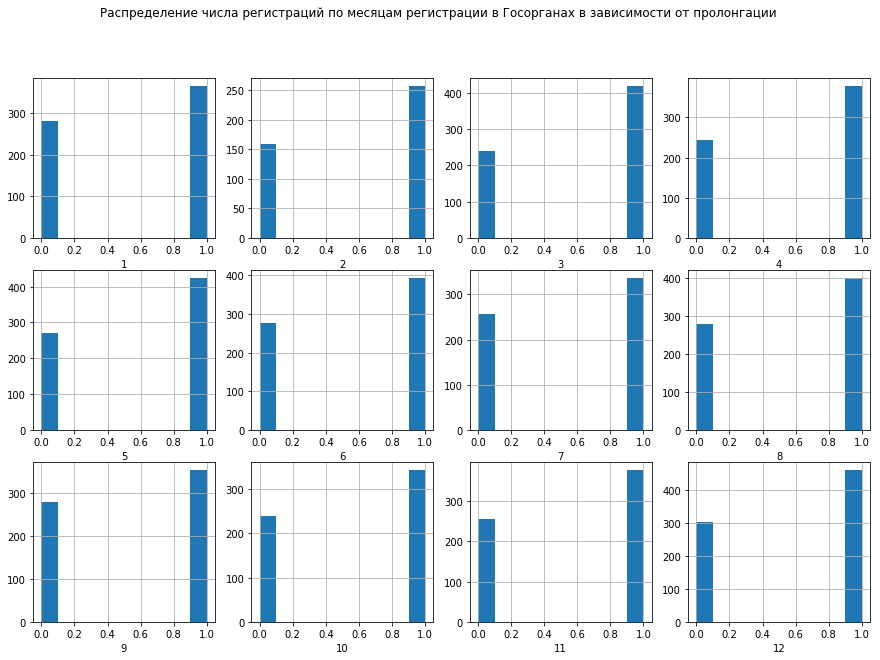

In [606]:
plt.figure(figsize=(15,10))
z=1
for i in range(1,13):
    plt.subplot(3,4,z)
    users[users.monthreg == i].is_prolong.hist()
    z+=1
    #plt.ylabel(u'Количество компаний')
    plt.xlabel(i)
plt.suptitle(u'Распределение числа регистраций по месяцам регистрации в Госорганах в зависимости от пролонгации')

Явной зависимости от даты регистрации в госслужбах нет.

In [607]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm 
#users.columns

In [608]:
cols = [u'workerCount', u'fssdccount', u'pfrdcCount', u'fnsdcCount', u'hasCloudCryptCertificate',
               u'documentsCount', u'cnt_users']
#users[cols].info()

In [609]:
from sklearn.preprocessing import scale
users.dropna(inplace=True)

In [610]:
data_subset = scale(users[cols])
is_prolong = users.is_prolong

In [611]:
method = TSNE(random_state=1)
tsne_representation = method.fit_transform(data_subset)

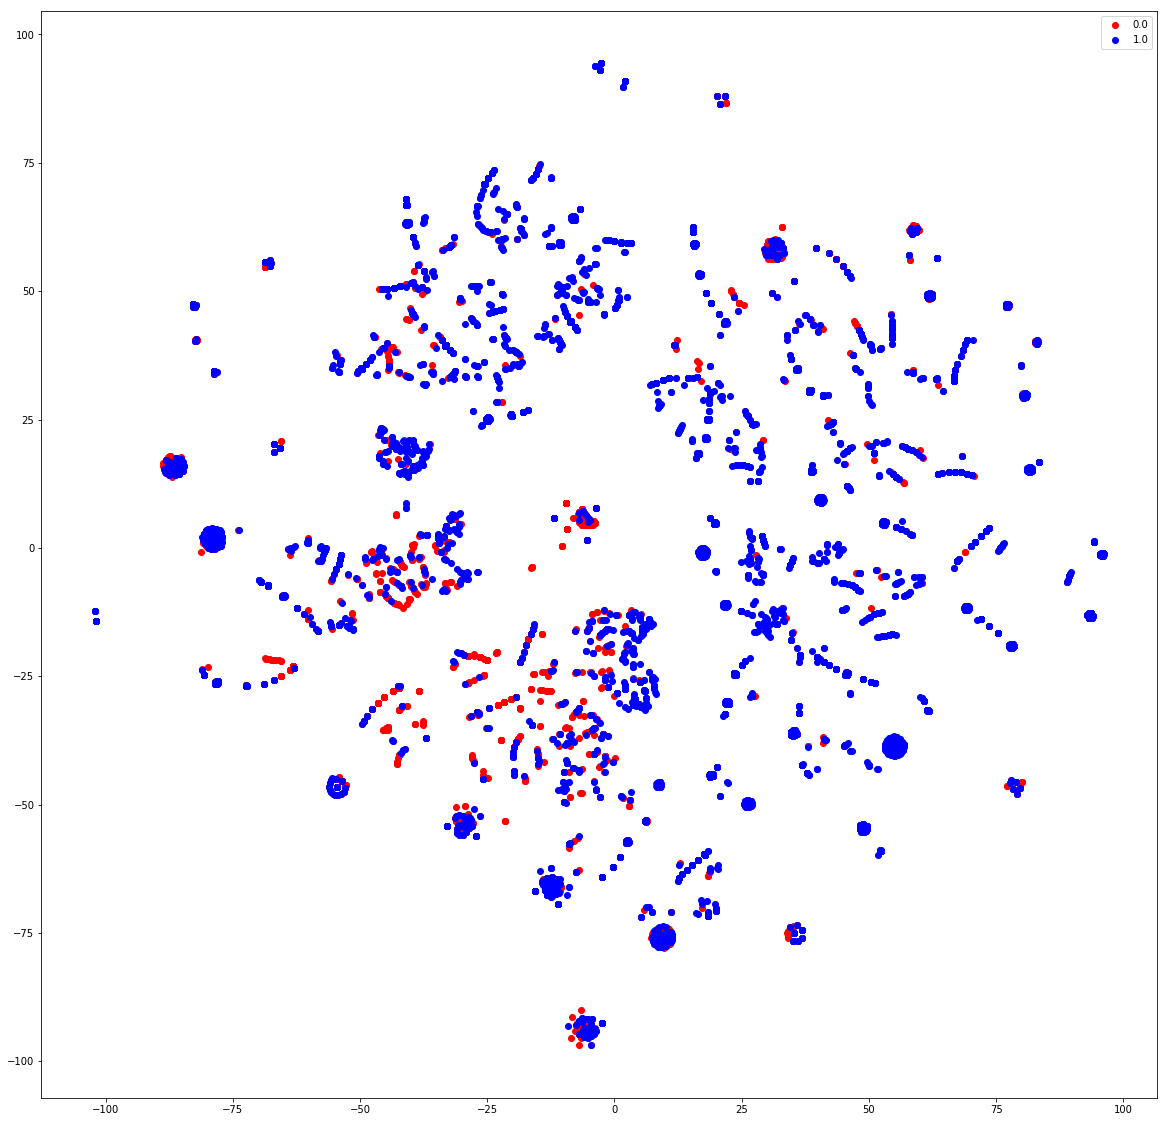

In [612]:
plt.figure(figsize=(20,20))
colors = ['red','blue']
for y, c in zip(set(users.is_prolong), colors):
    plt.scatter(tsne_representation[is_prolong==y, 0], 
                tsne_representation[is_prolong==y, 1], c=c, alpha=1, label=str(y))
plt.legend()

Метод TSNE не отобразил какие либо закономерности, однако есть некоторые области отображения, в которых количество не продливших подписку явно выделяется. В остальном красных точек не видно в большей степени по причине закрашивания их синими поверх.

Попробую проанализировать компании, которые не продлили подписку

In [613]:
data_subset = scale(users[users.is_prolong==0][cols]) ## отмасштабированый массив объектов, с меткой is_prolong = 0

In [614]:
from sklearn.cluster import KMeans
chisloclasterov = 4 ##  Количество групп выбрано случайно
kmeans = KMeans(n_clusters=chisloclasterov).fit(data_subset)
kmeans.labels_ # вывод меток классов

array([1, 1, 1, ..., 0, 3, 1])

In [615]:
means_info = [] # создание массива для заполнения
users_0 = users[users.is_prolong==0] # датафрейм с отключившимися компаниями

In [616]:
#users_0[kmeans.labels_==0][cols].hist(figsize=(10,10))
for y in set(kmeans.labels_):
    # Заполнение массива средними значениями признаков, в разделении на chisloklasterov
    means_info.append(users_0[kmeans.labels_==y][cols].mean().values) 
Means = pd.DataFrame(means_info) #преобразование в датафрейм
Means.columns = cols # присвоение наименований колонкам

Отрисовка получившихся значений

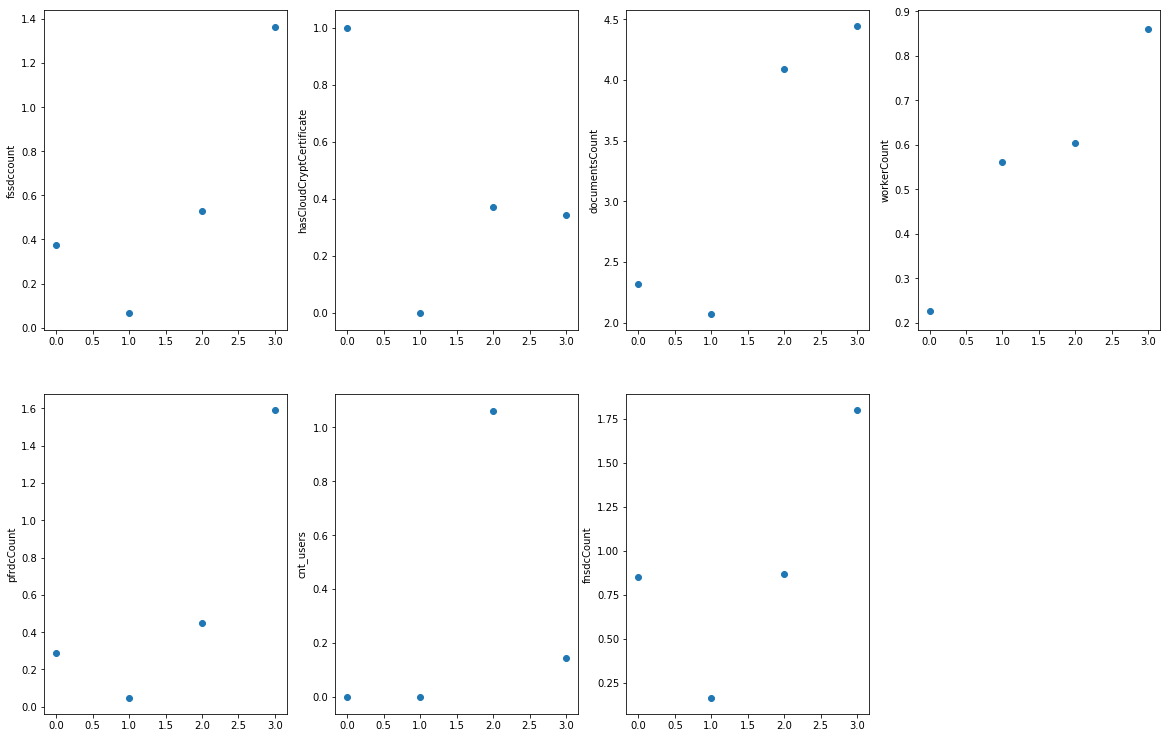

In [617]:
plt.figure(figsize=(20,20))
z=1
for y in set(Means.columns):
    plt.subplot(3,4,z)
    z+=1
    plt.scatter(Means.index,Means[y])
    plt.ylabel(y)

Малоинформативная картинка. Может что еще полезное удалось вычленить??

In [618]:
z = pd.Series(kmeans.labels_)
print z.value_counts()
Means

1    1498
3     673
0     465
2     446
dtype: int64


,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,documentsCount,cnt_users
0,0.225806,0.376344,0.286022,0.851613,1.000000,2.313978,0.000000
1,0.562083,0.064085,0.049399,0.164887,0.000000,2.066756,0.000000
2,0.603139,0.526906,0.450673,0.867713,0.369955,4.091928,1.060538
3,0.860327,1.364042,1.589896,1.797920,0.343239,4.445765,0.142645


Из данных видно, что не продлили подписку ~2000 компаний из ~3000 у которых признак cnt_users = 0, при этом из них 1500 - почти не пользовались отправкой документов в ФСС, ПФР, ФНС вероятно потому, что не имели электронной подписи. Те же кто имел электронную подпись и отказался продлять подписку отличаются низким средним числом работников - workerCount, и неактивно отправляют документы. ПО двум другим группам явных отличий не выявил.

#### Можно сформулировать некий рецепт продажи: "сперва продай возможность онлайн отправки документов, при этом продав электронную подпись, а после увеличивай активность работы работника компании с ПО и дальше вовлекай других работников этой организации в работу с этим ПО."

Дальше попробуем найти клиентов в группе риска, чтобы начать работу по предотвращению оттока клиентов.

## Подготовка данных для построения моделей

### Данные, которые буду использовать
таблица со всеми признаками без дат и ID (+едининый признак для сдвига)
   + для линейной модели Ridge (L2 регуляризацией)
   + для случайного леса
 
Для масштабирования признаков буду использовать MinMaxScaler()

Далее преобразую признак "система налогообложения" в бинарные признаки

In [619]:
from sklearn import linear_model, metrics, cross_validation, preprocessing
mask = (users['taxactionSystem']==u'ОСНО')
users.loc[mask, 'osno'] = 1.0
mask = (users['taxactionSystem']==u'ЕНВД')
users.loc[mask, 'envd'] = 1.0
mask = (users['taxactionSystem'].str.contains(u'ЕНВД')) & (users['taxactionSystem'].str.contains(u'УСН'))
users.loc[mask, 'usn-envd'] = 1.0
mask = (users['taxactionSystem'].str.contains(u'расходов')) & (users.cleartaxsystem !=u'УСН-ЕНВД')
users.loc[mask, 'usn-rashod'] = 1.0
mask = (users['cleartaxsystem']==5.0)
users.loc[mask, 'usn-dohod'] = 1.0
users = users.fillna(0)

Сформируем матрицы признаки-ответы

In [620]:
drop_cols = ['id','taxactionSystem', 'regdt', 'OrgCreationDate', 'cleartaxsystem','timefrom','timefromreg','month','is_prolong']
X = users.drop(drop_cols, axis=1)
y = users.is_prolong.values

Отмасштабируем и добавим единичный столбец

In [621]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = np.hstack([X, np.ones((X.shape[0],1))])

Разобъем выборку на обучающую и тестовую

In [622]:
(X_train,  X_test, y_train, y_test) = cross_validation.train_test_split(X, y, test_size=0.3)

In [623]:
#задаем модель
ridge = linear_model.RidgeClassifier()
#обучаем модель
ridge.fit(X_train, y_train)
#получаем ответы на тестовой выборке
predictions_ridge = ridge.predict(X_train)

In [624]:
print 'Точность модели Ridge на обучающей выборке = ', metrics.accuracy_score(y_train,predictions_ridge)
print 'Точность модели Ridge на тестовой выборке = ', metrics.accuracy_score(y_test,ridge.predict(X_test))

Точность модели Ridge на обучающей выборке =  0.75347875141
Точность модели Ridge на тестовой выборке =  0.735526315789


In [625]:
linear_scoring= cross_validation.cross_val_score(ridge, X, y, cv=20, scoring="accuracy")
print 'Средняя точность модели Ridge при кросс-валидации ', linear_scoring.mean()

Средняя точность модели Ridge при кросс-валидации  0.749000848708


In [626]:
log_reg = linear_model.LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
predictions_LR =log_reg.predict(X_test)
print 'Точность модели Логистической регресии на тестовой выборке =  ', metrics.accuracy_score(y_test,predictions_LR)

Точность модели Логистической регресии на тестовой выборке =   0.734649122807


In [627]:
log_reg_scoring= cross_validation.cross_val_score(log_reg, X, y, cv=20, scoring="accuracy")
print 'Средняя точность модели Логистической регресии  =  ', log_reg_scoring.mean()

Средняя точность модели Логистической регресии  =   0.750187485808


In [628]:
from sklearn import tree, ensemble

In [629]:
dtree = tree.DecisionTreeClassifier(min_samples_leaf=4)
bagging = ensemble.BaggingClassifier(dtree, n_estimators=40)
bag_scores = cross_validation.cross_val_score(bagging, X, y, cv=10)
print 'Средняя точность модели Бэггинг на решающем дереве при кросс-валидации =  ', bag_scores.mean()

Средняя точность модели Бэггинг на решающем дереве при кросс-валидации =   0.779543225718


In [630]:
bagging.fit(X_train,y_train)
predictions_bagging = bagging.predict(X_test)
print 'Точность модели Бэггинг на решающем дереве на тестовой выборке =  ', metrics.accuracy_score(y_test,predictions_bagging)

Точность модели Бэггинг на решающем дереве на тестовой выборке =   0.773684210526


In [631]:
estimator = ensemble.RandomForestClassifier(n_estimators = 150, max_depth=10)
score = cross_validation.cross_val_score(estimator, X, y, scoring = 'accuracy', cv = 5)  
print 'Средняя точность модели Случайный лес при кросс-валидации =  ', score.mean()

Средняя точность модели Случайный лес при кросс-валидации =   0.790073248


In [632]:
estimator.fit(X_train,y_train)
predictions_RF = estimator.predict(X_test)
print 'точность случайного леса', metrics.accuracy_score(y_test,predictions_RF)
print 'Проверим, насколько похожие результаты дают алгоритмы'
print metrics.accuracy_score(predictions_bagging,predictions_RF), ' = bagging-RF'
print metrics.accuracy_score(predictions_LR,predictions_RF), ' = LR-RF'
print metrics.accuracy_score(predictions_bagging,predictions_LR), ' = bagging-LR'
print metrics.accuracy_score(predictions_bagging,ridge.predict(X_test)), ' = bagging-ridge'
print metrics.accuracy_score(ridge.predict(X_test),predictions_RF), ' = ridge-RF'
print metrics.accuracy_score(ridge.predict(X_test),predictions_LR), ' = ridge-LR'

predictions_bagging_RF_LR_ridge = predictions_bagging*predictions_RF*predictions_LR*ridge.predict(X_test)
print 'Точность предсказания при условии умножения результатов разных алгоритмов\n', metrics.accuracy_score(y_test, predictions_bagging_RF_LR_ridge)

точность случайного леса 0.778070175439
Проверим, насколько похожие результаты дают алгоритмы
0.949122807018  = bagging-RF
0.849561403509  = LR-RF
0.827631578947  = bagging-LR
0.82149122807  = bagging-ridge
0.843421052632  = ridge-RF
0.977192982456  = ridge-LR
Точность предсказания при условии умножения результатов разных алгоритмов
0.755263157895


Поскольку разные алгоритмы дают разные результаты, эту особенность я далее и буду исопльзовать при построении предсказаний

### Приступим к выработке предскааний на тестовой выборке

С точки зрения качества, считаю что данная задача сводится к нахождению объектов, которые находятся ближе к зоне риска, и таким образом точность алгоритмов не так важна, как важно получение сигнала о риске потери клиента. Соответственно не вижу смысла улучшать точность какого либо алгоритма сейчас. На мой взгляд достаточно собрать голоса алгоритмов на каждый объект и уже получить перечень компаний (ID) которым надо звонить и обрабатывать, чтобы не потерять клиента.

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Категориальные признаки преобразованы в бинарные
Категориальные признаки отмасштабированы scaler'ом
Количество объектов за непродление у которых проголосовала хотя бы одна модель 1073


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x46D66030>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x3B0FEA50>]], dtype=object)

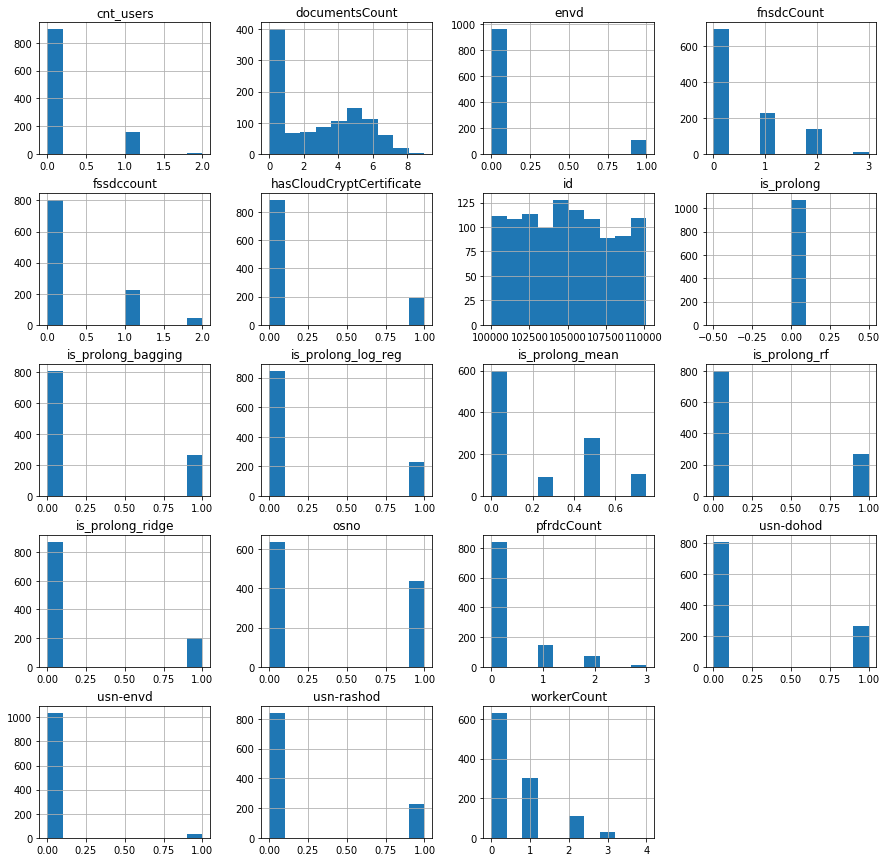

In [633]:
users = pd.read_csv('test_skb.csv', header=0, sep='\t', encoding ='cp1251')
users.dropna(inplace=True)

#проходим этапы предобработки данных, чтобы получился аналогичный массив

users['cleartaxsystem'] = ""*users.shape[1]        
mask = (users['taxactionSystem']==u'ОСНО')
users.loc[mask, 'cleartaxsystem'] = u'ОСНО'
mask = (users['taxactionSystem']==u'ЕНВД')
users.loc[mask, 'cleartaxsystem'] = u'ЕНВД'
mask = (users['taxactionSystem'].str.contains(u'ЕНВД')) & (users['taxactionSystem'].str.contains(u'УСН'))
users.loc[mask, 'cleartaxsystem'] = u'УСН-ЕНВД'
mask = (users['taxactionSystem'].str.contains(u'расходов')) & (users.cleartaxsystem !=u'УСН-ЕНВД')
users.loc[mask, 'cleartaxsystem'] = u'УСН-расходы'
users.cleartaxsystem[users.cleartaxsystem==''] = u'УСН-доходы'
   
#кодирование категориального признака
    
mask = (users['taxactionSystem']==u'ОСНО')
users.loc[mask, 'osno'] = 1.0
mask = (users['taxactionSystem']==u'ЕНВД')
users.loc[mask, 'envd'] = 1.0
mask = (users['taxactionSystem'].str.contains(u'ЕНВД')) & (users['taxactionSystem'].str.contains(u'УСН'))
users.loc[mask, 'usn-envd'] = 1.0
mask = (users['taxactionSystem'].str.contains(u'расходов')) & (users.cleartaxsystem !=u'УСН-ЕНВД')
users.loc[mask, 'usn-rashod'] = 1.0
mask = (users['cleartaxsystem']==u'УСН-доходы')
users.loc[mask, 'usn-dohod'] = 1.0
users = users.fillna(0)
print 'Категориальные признаки преобразованы в бинарные' 
# избавление от ненужных признаков
drop_cols = ['id','taxactionSystem', 'regdt', 'OrgCreationDate', 'cleartaxsystem']
X = users.drop(drop_cols, axis=1)
# масштабирование scaler'ом, который обучался на обучающей выборке
X = scaler.transform(X)
print "Категориальные признаки отмасштабированы scaler'ом" 

# добавление единичного признака к массиву для линейных моделей
X = np.hstack([X, np.ones((X.shape[0],1))])

# построение предсказаний ранее обученными моделями
predictions = ridge.predict(X)
users['is_prolong_ridge'] = predictions
predictions = log_reg.predict(X)
users['is_prolong_log_reg'] = predictions
predictions = bagging.predict(X)
users['is_prolong_bagging'] = predictions
predictions = estimator.predict(X)
users['is_prolong_rf'] = predictions

# добавление столбца результатов, в котором ответом является результат умножения
# т.е. будет 0 если хоть один из алгоритмов проголосовал за 0
users['is_prolong']=users['is_prolong_ridge']*users['is_prolong_log_reg']*users['is_prolong_bagging']*users['is_prolong_rf']
print 'Количество объектов за непродление у которых проголосовала хотя бы одна модель', users[users.is_prolong==0].shape[0]
# добавление столбца результатов, в котором ответом является результат усреднения голосов
users['is_prolong_mean']=(users['is_prolong_ridge']+users['is_prolong_log_reg']+users['is_prolong_bagging']+users['is_prolong_rf'])/4
# построение гистограмм признаков для объектов у которых все алгоритмы проголосовали за 0
users[users.is_prolong==0].hist(figsize=(15,15))

Количество объектов за непродление у которых проголосовало 3 или 4 модели: 691


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x46C56970>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x47A85EB0>]], dtype=object)

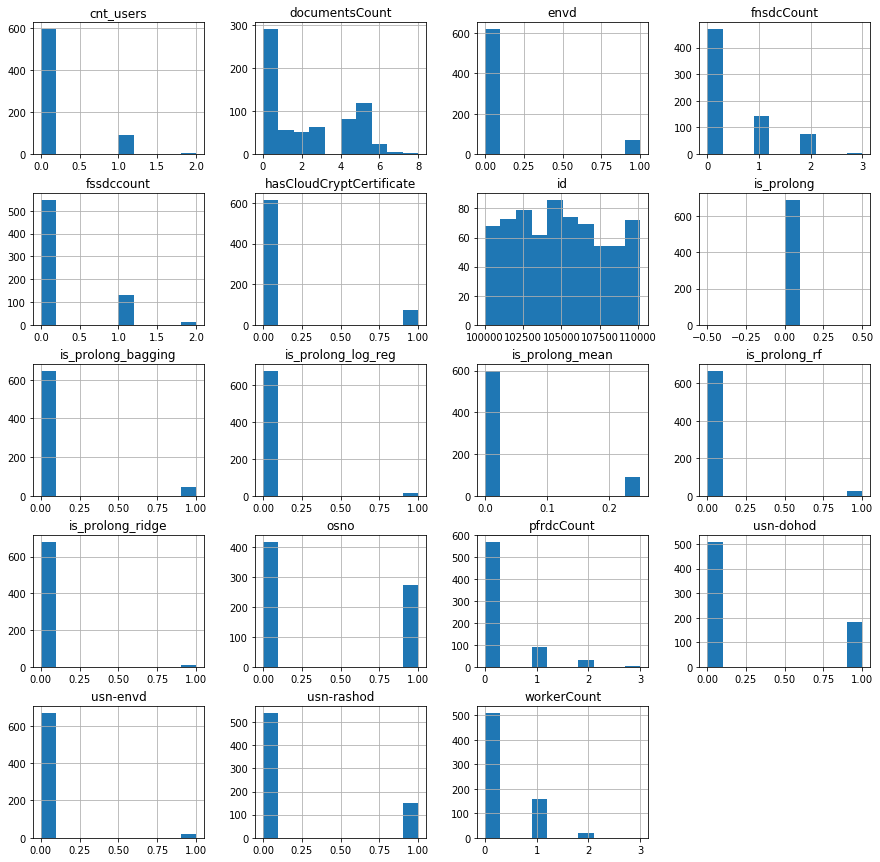

In [634]:
print 'Количество объектов за непродление у которых проголосовало 3 или 4 модели:', users[users.is_prolong_mean<0.3].shape[0]
users[users.is_prolong_mean<0.3].hist(figsize=(15,15))

Количество объектов за непродление у которых проголосовало 2 или 3 или 4 модели: 968


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x47AE4EB0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x4871ACD0>]], dtype=object)

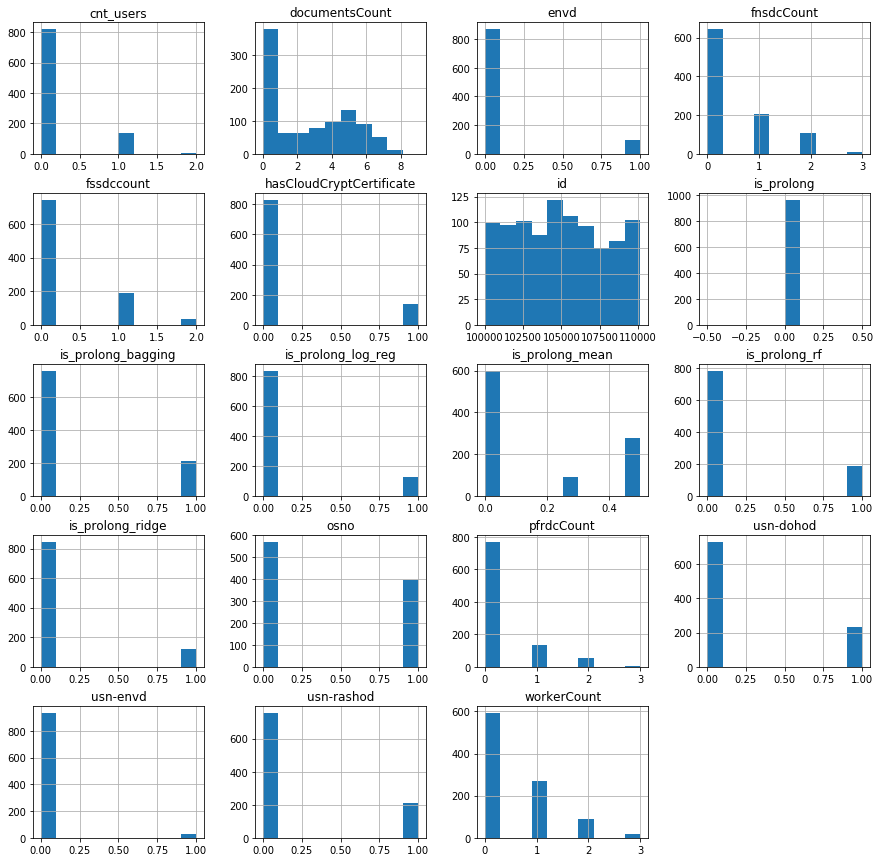

In [635]:
print 'Количество объектов за непродление у которых проголосовало 2 или 3 или 4 модели:', users[users.is_prolong_mean<0.6].shape[0]
users[users.is_prolong_mean<0.6].hist(figsize=(15,15))

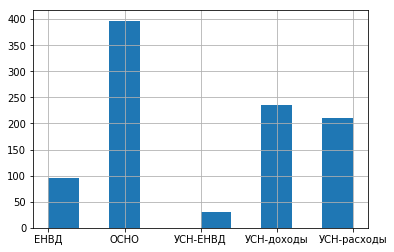

In [636]:
users[users.is_prolong_mean<=0.5].cleartaxsystem.hist()

In [637]:
# средние значения признаков у объектов с 2,3,4 голосами алгоритмов за 0
users[users.is_prolong_mean<=0.5].mean()

id                          104965.913223
workerCount                      0.509298
fssdccount                       0.267562
pfrdcCount                       0.273760
fnsdcCount                       0.464876
hasCloudCryptCertificate         0.141529
documentsCount                   2.566116
cnt_users                        0.157025
osno                             0.410124
envd                             0.099174
usn-envd                         0.030992
usn-rashod                       0.216942
usn-dohod                        0.242769
is_prolong_ridge                 0.125000
is_prolong_log_reg               0.133264
is_prolong_bagging               0.215909
is_prolong_rf                    0.192149
is_prolong                       0.000000
is_prolong_mean                  0.166581
dtype: float64

In [638]:
print users[users.is_prolong_mean==0].id.count(), 'компаний в ГРУППЕ РИСКА, все 4 алгоритма указали непродление'
print users[users.is_prolong_mean==0.25].id.count(), 'компаний, у которых 3 алгоритма указали непродление'
print users[users.is_prolong_mean==0.5].id.count(), 'компаний, у которых 2 алгоритма указали непродление'
print users[users.is_prolong_mean==0.75].id.count(), 'компаний, у которых 1 алгоритм указал непродление'

600 компаний в ГРУППЕ РИСКА, все 4 алгоритма указали непродление
91 компаний, у которых 3 алгоритма указали непродление
277 компаний, у которых 2 алгоритма указали непродление
105 компаний, у которых 1 алгоритм указал непродление


In [639]:
users.to_excel("prolong.xls")